In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
 

In [71]:
#Importamos datos experimentales
medidos = pd.read_csv('../../proyecto_final_EE-main/data/weekends.csv',index_col=0,parse_dates=True,names=['tiempo','Ti_ex'],skiprows=1) 
medidos

,Ti_ex
tiempo,
2019-06-08 00:00:00,25.348056
2019-06-08 00:00:20,25.354979
2019-06-08 00:00:40,25.359593
2019-06-08 00:01:00,25.348056
2019-06-08 00:01:20,25.351517
...,...
2019-07-28 23:58:20,24.798895
2019-07-28 23:58:40,24.802356
2019-07-28 23:59:00,24.673142


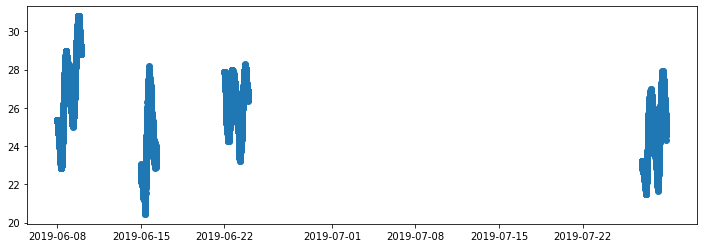

In [72]:
#Corroboramos que estén los fines de semana experimentales
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(medidos.index,medidos.Ti_ex)

In [73]:
CB = pd.read_csv('../IDF/Caso_Base/Proyecto_fin.csv',names=['tiempo','To','Ti_C1','Ti_C2','Ti_CB','Ti_techo1','Ti_techo2','Ti_techoJorge'],skiprows=1)
CB.tiempo = CB.tiempo.str.replace('24:00:00','23:59:59')
CB.tiempo = '2019 ' + CB.tiempo
CB.tiempo = pd.to_datetime(CB.tiempo,format='%Y %m/%d %H:%M:%S')
CB.set_index('tiempo',inplace=True)
del CB['Ti_C1']
del CB['Ti_C2']
del CB['Ti_techo1']
del CB['Ti_techo2']
del CB['Ti_techoJorge']
CB

,To,Ti_CB
tiempo,,
2019-05-03 00:10:00,23.0,28.717197
2019-05-03 00:20:00,23.0,28.645619
2019-05-03 00:30:00,23.0,28.510062
2019-05-03 00:40:00,22.8,28.402716
2019-05-03 00:50:00,22.7,28.384438
...,...,...
2019-06-25 23:20:00,0.0,8.519614
2019-06-25 23:30:00,0.0,8.450020
2019-06-25 23:40:00,0.0,8.380957


In [74]:
compara  = pd.concat([medidos,CB],axis=1)
compara

,Ti_ex,To,Ti_CB
tiempo,,,
2019-05-03 00:10:00,NaN,23.0,28.717197
2019-05-03 00:20:00,NaN,23.0,28.645619
2019-05-03 00:30:00,NaN,23.0,28.510062
2019-05-03 00:40:00,NaN,22.8,28.402716
2019-05-03 00:50:00,NaN,22.7,28.384438
...,...,...,...
2019-07-28 23:58:20,24.798895,NaN,NaN
2019-07-28 23:58:40,24.802356,NaN,NaN
2019-07-28 23:59:00,24.673142,NaN,NaN


## Hacemos la gráfica de fechas de validación

### 08/06/2019

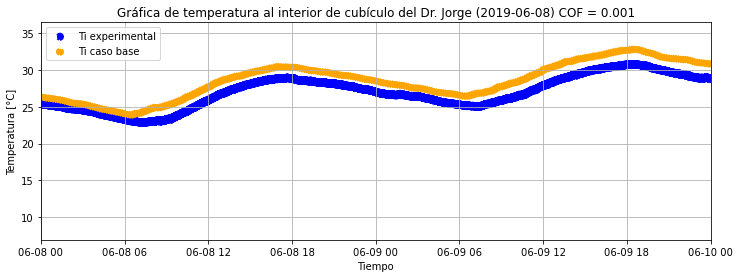

In [75]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CB, linestyle='--', linewidth=2, color='orange', label="Ti caso base")
fin1 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-08) COF = 0.001')
ax.legend()
ax.grid()


### 15/06/2019

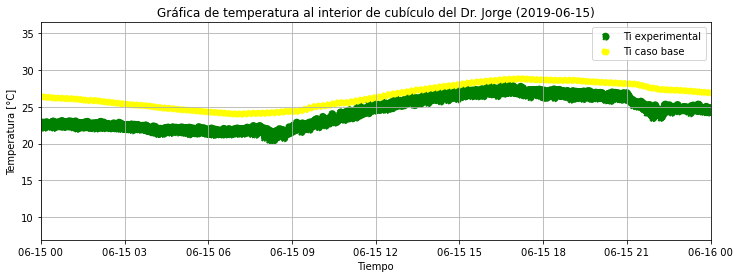

In [76]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-15')
fecha2 = fecha1 + pd.Timedelta('1D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='green', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CB, linestyle='--', linewidth=2, color='yellow', label="Ti caso base")
fin2 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-15)')
ax.legend()
ax.grid()


### 22/06/2019

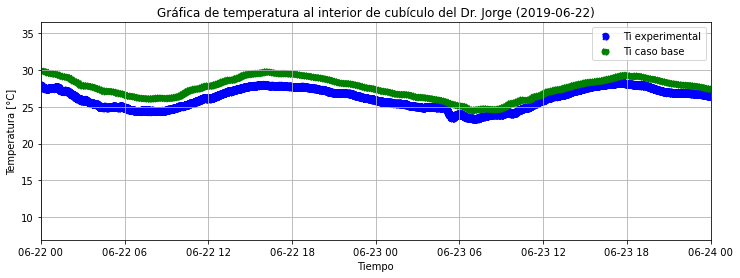

In [77]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CB, linestyle='--', linewidth=2, color='green', label="Ti caso base")
fin3 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-22)')
ax.legend()
ax.grid()


In [78]:
analisis = pd.concat([fin1,fin2,fin3],axis=0)
analisis

,Ti_ex,To,Ti_CB
tiempo,,,
2019-06-08 00:00:00,25.348056,NaN,NaN
2019-06-08 00:00:20,25.354979,NaN,NaN
2019-06-08 00:00:40,25.359593,NaN,NaN
2019-06-08 00:01:00,25.348056,NaN,NaN
2019-06-08 00:01:20,25.351517,NaN,NaN
...,...,...,...
2019-06-23 23:58:40,26.435996,NaN,NaN
2019-06-23 23:59:00,26.429073,NaN,NaN
2019-06-23 23:59:20,26.425612,NaN,NaN


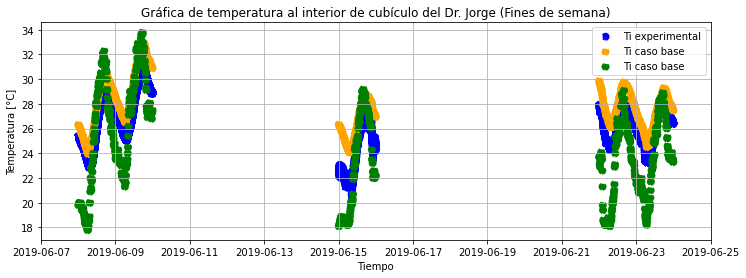

In [79]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-07')
fecha2 = fecha1 + pd.Timedelta('18D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(analisis.index,analisis.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(analisis.index,analisis.Ti_CB, linestyle='--', linewidth=2, color='orange', label="Ti caso base")
ax.scatter(analisis.index,analisis.To, linestyle='--', linewidth=2, color='green', label="Ti caso base")

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (Fines de semana)')
ax.legend()
ax.grid()

In [80]:
analisis.sort_index(inplace=True)
analisis

,Ti_ex,To,Ti_CB
tiempo,,,
2019-06-08 00:00:00,25.348056,NaN,NaN
2019-06-08 00:00:20,25.354979,NaN,NaN
2019-06-08 00:00:40,25.359593,NaN,NaN
2019-06-08 00:01:00,25.348056,NaN,NaN
2019-06-08 00:01:20,25.351517,NaN,NaN
...,...,...,...
2019-06-23 23:58:40,26.435996,NaN,NaN
2019-06-23 23:59:00,26.429073,NaN,NaN
2019-06-23 23:59:20,26.425612,NaN,NaN


In [84]:
analisis = analisis.resample('1h').bfill()
analisis

,Ti_ex,To,Ti_CB
tiempo,,,
2019-06-08 00:00:00,25.348056,NaN,NaN
2019-06-08 01:00:00,25.100011,20.0,26.101197
2019-06-08 02:00:00,24.771206,19.7,25.695976
2019-06-08 03:00:00,24.556618,19.6,25.409725
2019-06-08 04:00:00,24.153977,18.9,24.951275
...,...,...,...
2019-06-23 19:00:00,27.848124,27.0,29.132126
2019-06-23 20:00:00,27.375107,25.2,28.734320
2019-06-23 21:00:00,26.943623,23.8,28.265460


In [85]:
analisis.to_csv('../metricas/Fines_Caso_Base.csv')